In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)

In [54]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [55]:
df.columns =['Sales']

<Axes: xlabel='DATE'>

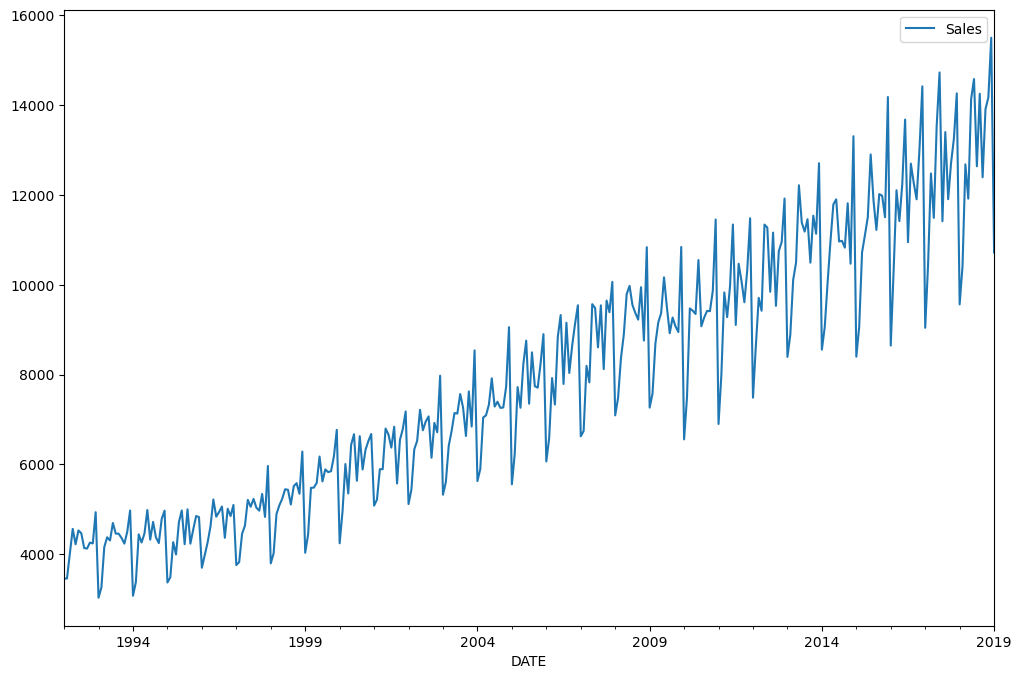

In [56]:
df.plot(figsize=(12,8))

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
results=seasonal_decompose(df['Sales'])

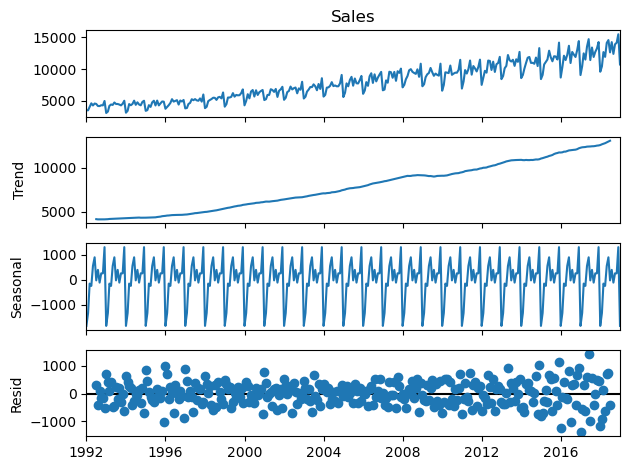

In [59]:
results.plot();

In [60]:
#results.seasonal #plot(figsize=(12,8))

In [61]:
len(df)

325

In [62]:
325-12

313

In [63]:
train =df.iloc[:313]
test =df.iloc[313:]

In [64]:
len(test)

12

In [65]:
ser =np.array([23,56,2,13,14])

In [66]:
ser.max()

56

In [67]:
ser/ser.max()

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler =MinMaxScaler()

In [70]:
scaler.fit(train) # find the max value in train data

MinMaxScaler()

In [71]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [72]:
#[t1 t2 t3] ---[t4]

In [73]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [74]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [75]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [76]:
n_inputs =3
n_features =1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [77]:
len(scaled_train)

313

In [78]:
len(generator)

310

In [79]:
X,y =generator[0]

In [80]:
X

array([[[0.03658432],
        [0.03649885],
        [0.08299855]]])

In [81]:
X.shape

(1, 3, 1)

In [82]:
y

array([[0.13103684]])

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [84]:
n_inputs =12
n_features =1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [85]:
model =Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25


C:\Users\SHRI\AppData\Local\Temp\ipykernel_17808\1408669387.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=25)


301/301 [==============================] - 6s 9ms/step - loss: 0.0196
Epoch 2/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0099
Epoch 3/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0093
Epoch 4/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0091
Epoch 5/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0078
Epoch 6/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0053
Epoch 7/25
301/301 [==============================] - 3s 8ms/step - loss: 0.0044
Epoch 8/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0034
Epoch 9/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0025
Epoch 10/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0031
Epoch 11/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0022
Epoch 12/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0022
Epoch 13/25
301/301 [========

In [87]:
model.history.history.keys()

dict_keys(['loss'])

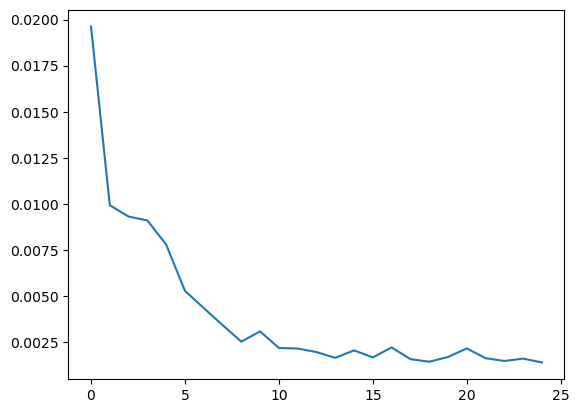

In [88]:
myloss=model.history.history['loss']
plt.plot(range(len(myloss)),myloss)

In [89]:
# 12 history steps ---> step 13
# last 12 points train --> pt 1 of test data

In [90]:
first_eval_batch =scaled_train[-12:]

In [91]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [93]:
first_eval_batch=first_eval_batch.reshape((1,n_inputs,n_features))

In [94]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 492ms/step


array([[0.7289529]], dtype=float32)

In [95]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

# FORECAST USING RNN MODEL

In [106]:
#holding my predictions
test_predictions =[]

#last n_inputs from the training set
first_eval_batch =scaled_train[-n_inputs:]

#reshape this to the RNN wants (same format as TimeseriesGenerator)
current_batch =first_eval_batch.reshape((1,n_inputs,n_features))

# how far into the future will I forecast?
for i in range(len(test)):
    
    #One timestep ahead of historical 12 points
    current_pred=model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    #UPDATE current batch to include prediction
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 52ms/step


In [105]:
#holding my predictions
test_predictions =[]

#last n_inputs from the training set
first_eval_batch =scaled_train[-n_inputs:]

#reshape this to the RNN wants (same format as TimeseriesGenerator)
current_batch =first_eval_batch.reshape((1,n_inputs,n_features))

In [108]:
my_first_pred =model.predict(current_batch)[0]

1/1 [==============================] - 0s 53ms/step


In [109]:
my_first_pred

array([0.8061136], dtype=float32)

In [112]:
current_batch.shape

(1, 12, 1)

In [113]:
current_batch[:,1:,:]

array([[[0.8391822 ],
        [0.80980289],
        [0.96905154],
        [1.02985942],
        [0.80035448],
        [0.9263469 ],
        [0.81322837],
        [0.8830725 ],
        [0.93466783],
        [0.99073172],
        [0.65035057]]])

In [114]:
current_batch[:,1:,:].shape

(1, 11, 1)

In [115]:
np.append(current_batch[:,1:,:],[[my_first_pred]],axis=1)

array([[[0.8391822 ],
        [0.80980289],
        [0.96905154],
        [1.02985942],
        [0.80035448],
        [0.9263469 ],
        [0.81322837],
        [0.8830725 ],
        [0.93466783],
        [0.99073172],
        [0.65035057],
        [0.8061136 ]]])

In [116]:
#holding my predictions
test_predictions =[]

#last n_inputs from the training set
first_eval_batch =scaled_train[-n_inputs:]

#reshape this to the RNN wants (same format as TimeseriesGenerator)
current_batch =first_eval_batch.reshape((1,n_inputs,n_features))

# how far into the future will I forecast?
for i in range(len(test)):
    
    #One timestep ahead of historical 12 points
    current_pred=model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    #UPDATE current batch to include prediction
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 53ms/step


In [117]:
test_predictions

[array([0.7289529], dtype=float32),
 array([0.8391822], dtype=float32),
 array([0.8098029], dtype=float32),
 array([0.96905154], dtype=float32),
 array([1.0298594], dtype=float32),
 array([0.8003545], dtype=float32),
 array([0.9263469], dtype=float32),
 array([0.81322837], dtype=float32),
 array([0.8830725], dtype=float32),
 array([0.9346678], dtype=float32),
 array([0.9907317], dtype=float32),
 array([0.6503506], dtype=float32)]

In [119]:
true_predictions =scaler.inverse_transform(test_predictions)

In [120]:
true_predictions

array([[11559.0197978 ],
       [12848.59253496],
       [12504.88400805],
       [14367.93396527],
       [15079.32539713],
       [12394.34707022],
       [13868.33236063],
       [12544.95868611],
       [13362.06512439],
       [13965.67889285],
       [14621.57034731],
       [10639.45132637]])

In [121]:
test['Predictions']=true_predictions

C:\Users\SHRI\AppData\Local\Temp\ipykernel_17808\2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


In [122]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11559.019798
2018-03-01,12683,12848.592535
2018-04-01,11919,12504.884008
2018-05-01,14138,14367.933965
2018-06-01,14583,15079.325397
2018-07-01,12640,12394.347070
2018-08-01,14257,13868.332361
2018-09-01,12396,12544.958686
2018-10-01,13914,13362.065124


<Axes: xlabel='DATE'>

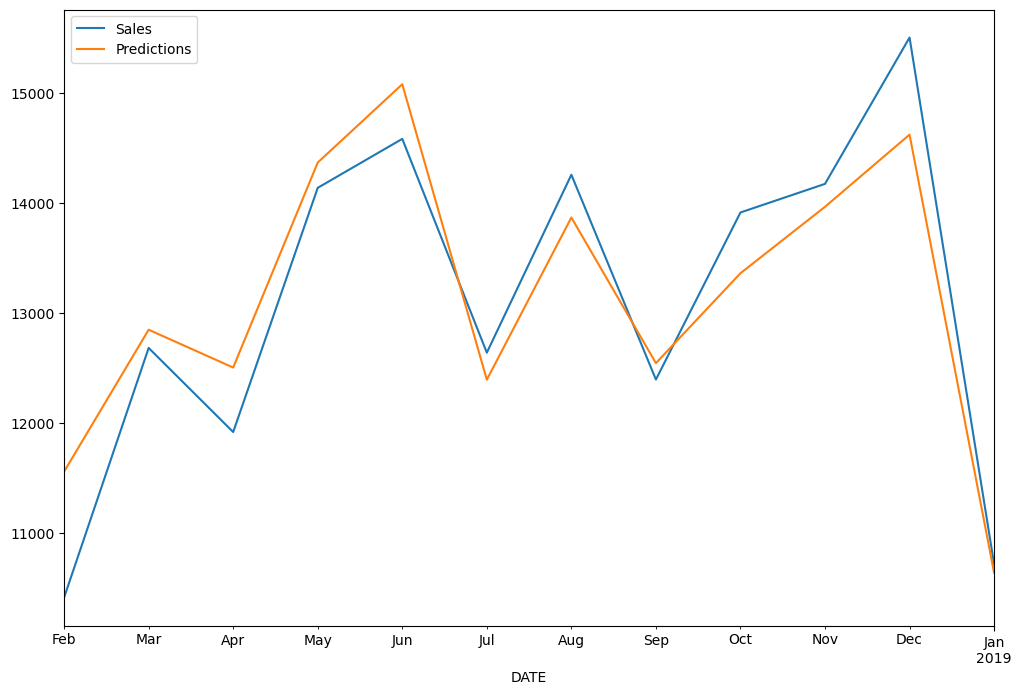

In [123]:
test.plot(figsize=(12,8))

In [124]:
model.save('mycoolmodel.h5')

C:\Users\SHRI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
pwd

'C:\\Users\\SHRI\\Downloads\\Udemy TSA\\7 - Deep Learning For Time Series Forecasting'

In [126]:
from keras.models import load_model

In [127]:
new_model = load_model('mycoolmodel.h5')

In [128]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
